# Classification Model Assignment
by Sarah Medina

In [1]:
# importing all libraries
import pandas as pd                                   # data science essentials
import matplotlib.pyplot as plt                       # data viz
import seaborn as sns                                 # enhanced data viz
import numpy as np                                    # numpy 
from sklearn.model_selection import train_test_split  # train-test split
from sklearn.linear_model import LogisticRegression   # logit regression
import statsmodels.formula.api as smf                 # logit regression
from sklearn.metrics import confusion_matrix          # confusion matrix
from sklearn.metrics import roc_auc_score             # auc 
from sklearn.neighbors import KNeighborsClassifier    # KNN classification
from sklearn.neighbors import KNeighborsRegressor     # KNN regression
from sklearn.preprocessing import StandardScaler      # standard scale

#import randomlibraries
import random as rand  #rand
import gender_guesser.detector as gender #gender guesser

# CART model packages
from sklearn.tree import DecisionTreeClassifier       # classification trees
from sklearn.tree import export_graphviz              # exports graphviz
from six import StringIO                              # saves objects in memory
from IPython.display import Image                     # displays on frontend
import pydotplus                                      # interprets dot objects

#Packages for Classification Tree Modelling
from sklearn.model_selection import RandomizedSearchCV  # hyperparameter tuning
from sklearn.metrics import make_scorer                 # c scorer
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm

# setting pd print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specify path and file name
file = 'Apprentice_Chef_Dataset.xlsx'


# reading the file
chefset = pd.read_excel(io=file)

#pd set option to see all the column names 
pd.set_option('display.max_columns', None)
chefset.head(n=5)


,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205


# User Defined Functions

In [2]:
#########################
# text_split_feature
#########################
def text_split_feature(col, df, sep=' ', new_col_name='NUM_OF_NAMES'):
    """
Splits values in a string Series (as part of a DataFrame) and sums the number
of resulting items. Automatically appends summed column to original DataFrame.

PARAMETERS
----------
col          : column to split
df           : DataFrame where column is located
sep          : string sequence to split by, default ' '
new_col_name : name of new column after summing split, default
               'number_of_names'
"""
    
    df[new_col_name] = 0
    
    
    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))

In [3]:

#########################
# mv_flagger
#########################
def mv_flagger(df):
    """
Flags all columns that have missing values with 'm-COLUMN_NAME'.

PARAMETERS
----------
df : DataFrame to flag missing values


RETURNS
-------
DataFrame with missing value flags."""


    for col in df:

        if df[col].isnull().astype(int).sum() > 0:
            df['m_'+col] = df[col].isnull().astype(int)
            
    return df




In [4]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
X_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the X data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing X_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [5]:
########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800, export = False):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    export     : bool, defalut False
        whether or not to export the tree as a .png file
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width,
                unconfined = True)


    return img

# Cleaning/ Ft engineering

In [6]:
#working with emails (categoricals) first
#we want to seperate email domains before making dummie vars
# setting random seed
rand.seed(a = 327)

#  splitting personal emails

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in chefset.iterrows():
    
    # splitting email domain at '@'
    split_email = chefset.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
email_df

,0,1
0,saathos,unitedhealth.com
1,alysanne.osgrey,ge.org
2,edwyd.fossoway,jnj.com
3,eleyna.westerling,ge.org
4,elyn.norridge,jnj.com
...,...,...
1941,obara.sand,yahoo.com
1942,quentyn.blackwood,yahoo.com
1943,rhonda.rowan,gmail.com
1944,turnip,yahoo.com


In [7]:
# concatenating with original DataFrame

# safety measure in case of multiple concatenations
chefset = pd.read_excel(file)


# renaming column to concatenate
email_df.columns = ['0' , 'EMAIL_domains']


# concatenating personal_email_domain with friends DataFrame
chefset = pd.concat([chefset, email_df['EMAIL_domains']],
                     axis = 1)


# printing value counts of personal_email_domain
chefset.loc[: ,'EMAIL_domains'].value_counts()

gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
merck.com            28
jnj.com              28
cocacola.com         28
mcdonalds.com        28
nike.com             27
apple.com            27
ge.org               26
dupont.com           26
ibm.com              26
chevron.com          25
microsoft.com        25
unitedhealth.com     24
exxon.com            24
travelers.com        24
boeing.com           23
pg.com               22
caterpillar.com      22
verizon.com          22
mmm.com              22
walmart.com          21
disney.com           21
visa.com             20
pfizer.com           20
jpmorgan.com         19
cisco.com            18
goldmansacs.com      18
unitedtech.com       18
homedepot.com        17
intel.com            17
Name: EMAIL_domains, dtype: int64

In [8]:
#splittling the domains at "."
# email domain types
# creating a list for email names with no dots to rduce error
dot_lst = []

# looping over each email address
for index, col in chefset.iterrows():
    
    # splitting email domain at '.'
    email_dot = chefset.loc[index, 'EMAIL_domains'].split(sep = '.')
    
    # appending dot_lst with the results
    dot_lst.append(email_dot)
    

# converting _df into a DataFrame 
emailclean_df = pd.DataFrame(dot_lst)


# displaying the results
emailclean_df

,0,1
0,unitedhealth,com
1,ge,org
2,jnj,com
3,ge,org
4,jnj,com
...,...,...
1941,yahoo,com
1942,yahoo,com
1943,gmail,com
1944,yahoo,com


In [9]:
# CLEAN EMAIL DOMAINS IN A NEW COLUMN IN CHEFSET

# safety measure in case of multiple concatenations
chefset = pd.read_excel(file)


# renaming column to concatenate
emailclean_df.columns = ['CLEAN_EMAILS' , '1']


# concatenating personal_email_domain with chefset DataFrame
#adds the column to the dataset
chefset = pd.concat([chefset, emailclean_df['CLEAN_EMAILS']],
                   axis = 1)


# printing value counts of personal_email_domain
chefset.loc[: ,'CLEAN_EMAILS'].value_counts()

gmail           303
protonmail      284
yahoo           274
msn              72
aol              69
passport         64
hotmail          63
live             62
me               59
amex             30
cocacola         28
mcdonalds        28
merck            28
jnj              28
apple            27
nike             27
ibm              26
ge               26
dupont           26
microsoft        25
chevron          25
exxon            24
unitedhealth     24
travelers        24
boeing           23
pg               22
caterpillar      22
mmm              22
verizon          22
disney           21
walmart          21
pfizer           20
visa             20
jpmorgan         19
cisco            18
unitedtech       18
goldmansacs      18
homedepot        17
intel            17
Name: CLEAN_EMAILS, dtype: int64

In [10]:
#Aggregating personal and work emails into 2 groups 
#values for some emails are less than 100 observations so we aggregate

# email domain types, personal and work
personal_emails = ['gmail','protonmail','yahoo']

work_emails  = ['amex','cocacola','jnj','merck',
                       'mcdonalds','nike','apple','dupont','ibm',
                       'ge','microsoft','chevron','travelers',
                       'exxon','unitedhealth','boeing','caterpillar',
                       'mmm','pg','verizon','walmart','disney',
                       'pfizer','visa','jpmorgan','unitedtech',
                       'cisco','goldmansacs','intel','homedepot']

junk_emails= ['me','aol','hotmail','live','msn','passport']

# placeholder list
email_lst = []


# looping to group observations by domain type
for domain in chefset['CLEAN_EMAILS']:
    
        if domain in personal_emails:
            email_lst.append('personal')
            
        elif domain in work_emails:
            email_lst.append('work')
        
        elif domain in junk_emails:
            email_lst.append('junk')
            
        else:
            print('Unknown')


# concatenating with original DataFrame
chefset['DOMAIN_GROUP'] = pd.Series(email_lst)


# checking results
chefset['DOMAIN_GROUP'].value_counts()

personal    861
work        696
junk        389
Name: DOMAIN_GROUP, dtype: int64

In [11]:
# one hot encoding categorical variables
one_hot_DOMAIN_GROUP    = pd.get_dummies(chefset['DOMAIN_GROUP'])

# dropping categorical variables after they've been encoded
chefset= chefset.drop('DOMAIN_GROUP', axis = 1)

# joining codings together
#appending new categorical data
chefset = chefset.join([one_hot_DOMAIN_GROUP ])

# saving new columns
new_columns = chefset.columns

In [12]:
#changing the name of a column
#largest order size is actually the avg number or meals ordered
chefset.rename(columns={'LARGEST_ORDER_SIZE': 'AVG_NUM_MEALS_ORD'}, inplace=True)

In [13]:
#initiatiating an imputation value
fill= "na"

#imputing 'FAMILY_NAME'
chefset['FAMILY_NAME'] =chefset['FAMILY_NAME'].fillna(fill)

In [14]:
#if any values are still missing
chefset.isnull().any(axis=0).any(axis=0)

False

In [15]:
#double checking that blank values were replaced with "na"
(chefset['FAMILY_NAME']== "na").sum()

47

In [16]:
# calling text_split_feature
text_split_feature('NAME', chefset, sep='')


# checking results
chefset['NUM_OF_NAMES']

0       1
1       2
2       2
3       2
4       2
       ..
1941    2
1942    2
1943    2
1944    1
1945    2
Name: NUM_OF_NAMES, Length: 1946, dtype: int64

In [17]:
# creating a (Pearson) correlation matrix
df_corr = chefset.corr(method='pearson').round(2)

# printing (Pearson) correlations with CSS
print(df_corr.loc['CROSS_SELL_SUCCESS'].sort_values(ascending = False))

CROSS_SELL_SUCCESS             1.00
work                           0.19
NUM_OF_NAMES                   0.16
CANCELLATIONS_BEFORE_NOON      0.16
MOBILE_NUMBER                  0.10
TASTES_AND_PREFERENCES         0.08
REFRIGERATED_LOCKER            0.07
CONTACTS_W_CUSTOMER_SERVICE    0.04
PC_LOGINS                      0.04
PACKAGE_LOCKER                 0.04
MASTER_CLASSES_ATTENDED        0.04
personal                       0.04
AVG_PREP_VID_TIME              0.03
MEDIAN_MEAL_RATING             0.03
EARLY_DELIVERIES               0.02
AVG_NUM_MEALS_ORD              0.02
LATE_DELIVERIES                0.01
TOTAL_MEALS_ORDERED            0.01
TOTAL_PHOTOS_VIEWED            0.01
AVG_TIME_PER_SITE_VISIT        0.01
PRODUCT_CATEGORIES_VIEWED      0.00
UNIQUE_MEALS_PURCH             0.00
REVENUE                        0.00
WEEKLY_PLAN                   -0.01
AVG_CLICKS_PER_VISIT          -0.04
CANCELLATIONS_AFTER_NOON      -0.05
MOBILE_LOGINS                 -0.05
junk                        

In [18]:
############################################

#Building Full Model to Compare  Explanatory Variables 

############################################

# making a copy of chef
chefset_data = chefset.copy()


# dropping from the explanatory variable set
chefset_data = chefset_data.drop(['CROSS_SELL_SUCCESS',
                                          #following columns removed due to no use or
                                          #redundancy (ie: email categories and all email names)
                                          'NAME','EMAIL','FIRST_NAME','FAMILY_NAME','CLEAN_EMAILS'
                                          
                                         ], axis = 1)
# declaring response variable
chefset_target = chefset.loc[ : , 'CROSS_SELL_SUCCESS']

# formatting each explanatory variable for statsmodels
for val in chefset_data:
    print(val,'+')


REVENUE +
TOTAL_MEALS_ORDERED +
UNIQUE_MEALS_PURCH +
CONTACTS_W_CUSTOMER_SERVICE +
PRODUCT_CATEGORIES_VIEWED +
AVG_TIME_PER_SITE_VISIT +
MOBILE_NUMBER +
CANCELLATIONS_BEFORE_NOON +
CANCELLATIONS_AFTER_NOON +
TASTES_AND_PREFERENCES +
PC_LOGINS +
MOBILE_LOGINS +
WEEKLY_PLAN +
EARLY_DELIVERIES +
LATE_DELIVERIES +
PACKAGE_LOCKER +
REFRIGERATED_LOCKER +
AVG_PREP_VID_TIME +
AVG_NUM_MEALS_ORD +
MASTER_CLASSES_ATTENDED +
MEDIAN_MEAL_RATING +
AVG_CLICKS_PER_VISIT +
TOTAL_PHOTOS_VIEWED +
junk +
personal +
work +
NUM_OF_NAMES +


# Train test split/ Small logistic Regression

In [19]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            chefset_data,
            chefset_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = chefset_target)


# merging training data for statsmodels
chefset_train = pd.concat([x_train, y_train], axis = 1)

In [20]:
#response var proportions
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")





Response Variable Proportions (Training Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64



In [21]:
chef_dict={
    # full model
 'logit_full'   : ['REVENUE','TOTAL_MEALS_ORDERED','UNIQUE_MEALS_PURCH',
                   'CONTACTS_W_CUSTOMER_SERVICE','PRODUCT_CATEGORIES_VIEWED',
                   'AVG_TIME_PER_SITE_VISIT','MOBILE_NUMBER','CANCELLATIONS_BEFORE_NOON',
                   'CANCELLATIONS_AFTER_NOON','TASTES_AND_PREFERENCES','PC_LOGINS',
                   'MOBILE_LOGINS','WEEKLY_PLAN','EARLY_DELIVERIES','LATE_DELIVERIES',
                   'PACKAGE_LOCKER','REFRIGERATED_LOCKER','AVG_PREP_VID_TIME',
                   'AVG_NUM_MEALS_ORD','MASTER_CLASSES_ATTENDED','MEDIAN_MEAL_RATING',
                   'AVG_CLICKS_PER_VISIT','TOTAL_PHOTOS_VIEWED','junk','personal',
                   'work','NUM_OF_NAMES'],


 # significant variables only (set 1)
 'logit_sig'    : ['MOBILE_NUMBER','CANCELLATIONS_BEFORE_NOON',
'TASTES_AND_PREFERENCES','NUM_OF_NAMES','PC_LOGINS','EARLY_DELIVERIES','personal','junk','REFRIGERATED_LOCKER',
                  'MASTER_CLASSES_ATTENDED'],


 # significant variables only (set 2)
 'logit_sig_2'  : ['MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 
                  'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'EARLY_DELIVERIES',
                  'REFRIGERATED_LOCKER', 'junk', 'work', 
                  'NUM_OF_NAMES'],
    
}

In [22]:
# instantiating a logistic regression model object
logistic = smf.logit(formula = """ CROSS_SELL_SUCCESS ~ 
                                         MOBILE_NUMBER + 
                                         CANCELLATIONS_BEFORE_NOON +  
                                         TASTES_AND_PREFERENCES + 
                                         NUM_OF_NAMES+
                                         PC_LOGINS + 
                                         EARLY_DELIVERIES + 
                                         REFRIGERATED_LOCKER + 
                                         work + 
                                         junk +MASTER_CLASSES_ATTENDED 
                                          """,
                                        data = chefset_train)


# fitting the model object
results = logistic.fit()


# checking the results SUMMARY
results.summary()

Optimization terminated successfully.
         Current function value: 0.541596
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1448
Method:                           MLE   Df Model:                           10
Date:                Tue, 26 Jan 2021   Pseudo R-squ.:                  0.1375
Time:                        02:15:49   Log-Likelihood:                -790.19
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 2.050e-48
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -3.0339      0.658     -4.608      0.000      -4.324      -1.744
MOBILE_NUMBER                 0.8741      0.176      4.955      0.000       0.528       1.220
CANCELLATIONS_BEFORE_NOON     0.2762      0.046      5.949      0.000       0.185       0.367
TASTES_AND_PREFERENCES        0.3895      0.135      2.877      0.004       0.124       0.655
NUM_OF_NAMES                  0.5491      0.094      5.864      0.000       0.366       0.733
PC_LOGINS                     0.2265      0.107      2.117      0.034       0.017       0.436
EARLY_DELIVERIES              0.0610      0.028      2.205      0.027       0.007       0.115
REFRIGERATED_LOCKER           0.5314      0.209      2.542      0.011       0.122       0.941
work                          0.6010      0.144      4.167      0.000       0.318       0.884
junk                         -1.3114      0.157     -8.344      0.000      -1.619      -1.003
MASTER_CLASSES_ATTENDED       0.2217      0.097      2.278      0.023       0.031       0.412
=============================================================================================
"""

# Model Performance

In [43]:
#calling the explanatory vars 
chefset_data   =  chefset.loc[ : , chef_dict['logit_sig']]
chefset_target =  chefset.loc[ : , 'CROSS_SELL_SUCCESS']

# train/test split
x_train, x_test, y_train, y_test = train_test_split(
                                chefset_data,
                                chefset_target,
                                random_state = 219,
                                test_size    = 0.25,
                                stratify     = chefset_target)

# merging training data for statsmodels
chefset_train = pd.concat([x_train, y_train], axis = 1)

In [45]:
#LR tuned
# INSTANTIATING a logistic regression model with tuned parameters
lr_tuned = LogisticRegression(C = 4,
                              random_state = 219, 
                              solver       = 'lbfgs', 
                              warm_start   = True)

#fitting the data
lr_tuned_fit = lr_tuned.fit(x_train, y_train)

# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(x_test)


# SCORING the results
print('LR Tuned Training ACCURACY:', lr_tuned.score(x_train, y_train).round(4))
print('LR Tuned Testing  ACCURACY:', lr_tuned.score(x_test, y_test).round(4))
print('LR Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(x_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred).round(4) # auc

LR Tuned Training ACCURACY: 0.7416
LR Tuned Testing  ACCURACY: 0.731
LR Tuned AUC Score        : 0.6327


In [25]:
#unpacking the confusion matrix for lR tuned
lr_tuned_tn, \
lr_tuned_fp, \
lr_tuned_fn, \
lr_tuned_tp = confusion_matrix(y_true = y_test, y_pred = lr_tuned_pred).ravel()


# printing each result 
print(f"""
True Negatives : {lr_tuned_tn}
False Positives: {lr_tuned_fp}
False Negatives: {lr_tuned_fn}
True Positives : {lr_tuned_tp}
""")


True Negatives : 56
False Positives: 100
False Negatives: 31
True Positives : 300



# Classification Trees 

In [47]:
#full tree
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
#chefset data, chefset target will give you way higher values!!!!
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                    y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                    y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.9102
Full Tree Testing ACCURACY : 0.6961
Full Tree AUC Score: 0.6426


In [27]:
# unpacking the confusion matrix for full tree
#unpacking diff things like in train test split
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 79
False Positives: 77
False Negatives: 70
True Positives : 261



In [48]:
#pruning the tree
# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 5,
                                     splitter='best',
                                     criterion='gini',
                                     min_samples_leaf = 25,
                                     random_state = 219)


# FITTING the training data
pruned_tree_fit  = pruned_tree.fit(x_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(x_test)

# SCORING the model
print('Prune Tree Training ACCURACY:', pruned_tree_fit.score(x_train, y_train).round(4))
print('Prune Tree Testing  ACCURACY:', pruned_tree_fit.score(x_test, y_test).round(4))
print('Prune Tree AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) # auc

Prune Tree Training ACCURACY: 0.7526
Prune Tree Testing  ACCURACY: 0.7782
Prune Tree AUC Score        : 0.725


In [29]:
# unpacking the confusion matrix for pruned tree
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = pruned_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 87
False Positives: 69
False Negatives: 39
True Positives : 292



In [30]:
#HYPERparameter Tool UDF
# declaring a hyperparameter space
criterion_space = ['gini', 'entropy']
splitter_space  = ['best', 'random']
depth_space     = pd.np.arange(1, 25, 1)
leaf_space      = pd.np.arange(1, 100, 1)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_space,
              'splitter'         : splitter_space,
              'max_depth'        : depth_space,
              'min_samples_leaf' : leaf_space}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 219)


# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 3,
                                   n_iter                = 1000,
                                   random_state          = 219,
                                   scoring = make_scorer(roc_auc_score,
                                             needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(chefset_data, chefset_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

<ipython-input-30-9b6bb91f86b8>:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  depth_space     = pd.np.arange(1, 25, 1)
<ipython-input-30-9b6bb91f86b8>:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  leaf_space      = pd.np.arange(1, 100, 1)


Tuned Parameters  : {'splitter': 'best', 'min_samples_leaf': 16, 'max_depth': 3, 'criterion': 'gini'}
Tuned Training AUC: 0.7032


In [49]:
#tuned tree
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = DecisionTreeClassifier(splitter         = 'best',
                                    min_samples_leaf = 16,
                                    max_depth        = 3,
                                    criterion        = 'gini'
                                   )
# Fitting training data
tree_tuned_fit  = tree_tuned.fit(x_train, y_train)

# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(x_test)


# SCORING the results
print('Tune Tree Training ACCURACY:', tree_tuned.score(x_train, y_train).round(4))
print('Tune Tree Testing  ACCURACY:', tree_tuned.score(x_test, y_test).round(4))
print('Tune Tree AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(x_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = tree_tuned_pred).round(4) # auc

Tune Tree Training ACCURACY: 0.7402
Tune Tree Testing  ACCURACY: 0.7762
Tune Tree AUC Score        : 0.732


In [32]:
# unpacking the confusion matrix for tuned tree
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")


True Negatives : 95
False Positives: 61
False Negatives: 48
True Positives : 283



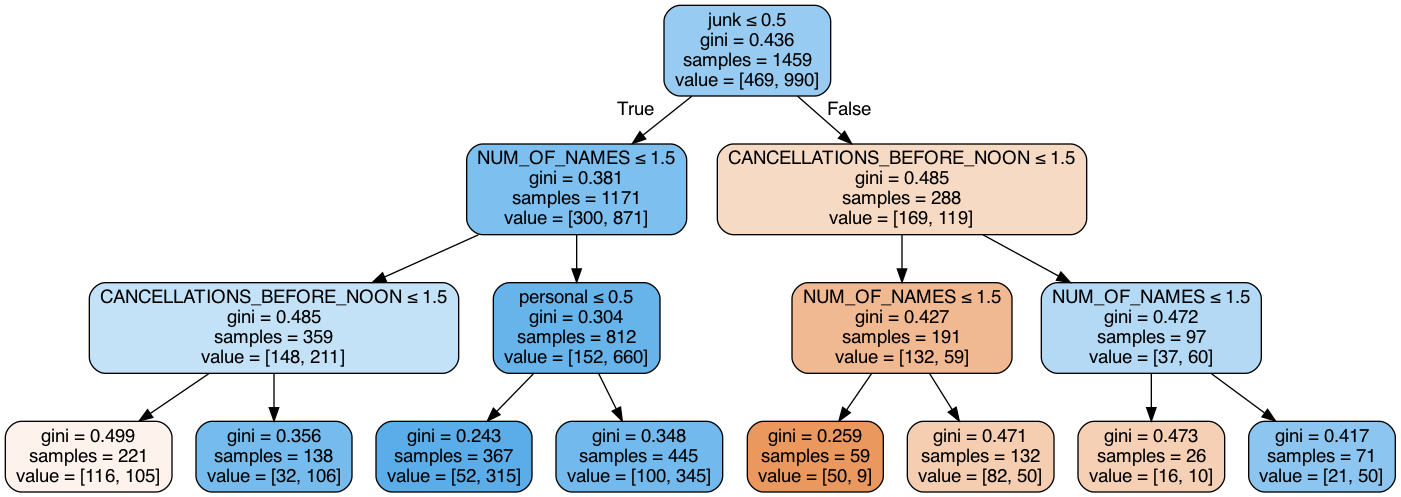

In [33]:
# displaying the tree for tree tuned
display_tree(tree = tree_tuned,
             feature_df = chefset_data,
             height = 1500,
             width  = 1500)

# KNN

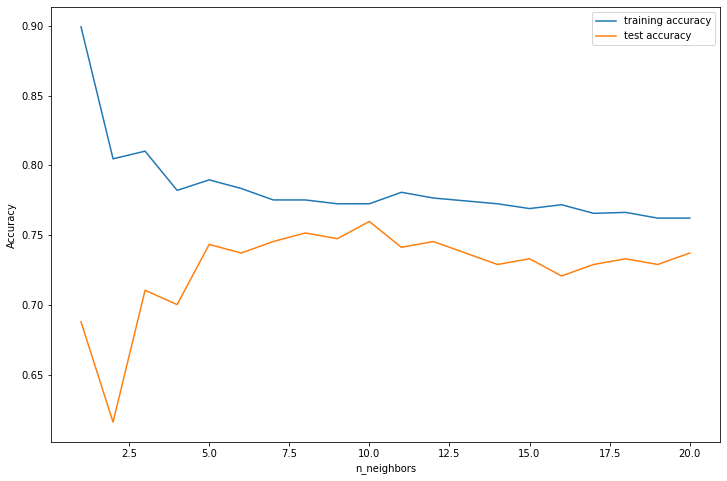

The optimal number of neighbors is: 10


In [34]:
# determining the optimal number of neighbors to help KNN
opt_neighbors = optimal_neighbors(x_data= chefset_data,
                                  y_data= chefset_target,
                                  response_type = 'class')

In [35]:
#KNN
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(chefset_data)


# TRANSFORMING the data
x_scaled     = scaler.transform(chefset_data)


# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled) 


# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            chefset_target,
            random_state = 219,
            test_size = 0.25,
            stratify = chefset_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(x_test_scaled)


# SCORING the results
print('KNN Training ACCURACY:', knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('KNN Testing  ACCURACY:', knn_fit.score(x_test_scaled, y_test_scaled).round(4))
print('KNN AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))


# saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)


# saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)

KNN Training ACCURACY: 0.7656
KNN Testing  ACCURACY: 0.7474
KNN AUC Score        : 0.682


In [36]:
# unpacking the confusion matrix for KNN
knn_tree_tn, \
knn_tree_fp, \
knn_tree_fn, \
knn_tree_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {knn_tree_tn}
False Positives: {knn_tree_fp}
False Negatives: {knn_tree_fn}
True Positives : {knn_tree_tp}
""")


True Negatives : 78
False Positives: 78
False Negatives: 45
True Positives : 286



# Random Forest

In [50]:
#RANdom forest
# building a model based on hyperparameter tuning results

# copy/pasting in the best_estimator_ results
# to avoid running another RandomizedSearch
forest_tuned = RandomForestClassifier(criterion='gini', min_samples_leaf=11,
                                    n_estimators=850, random_state=219, warm_start=True, bootstrap=False, 
                                      max_depth=8)


# FITTING the model object
forest_tuned_fit = forest_tuned.fit(x_train, y_train)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                       y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

Forest Tuned Training ACCURACY: 0.7779
Forest Tuned Testing  ACCURACY: 0.7864
Forest Tuned AUC Score        : 0.7107


In [38]:
# unpacking the confusion matrix for tuned Forest
for_tuned_tn, \
for_tuned_fp, \
for_tuned_fn, \
for_tuned_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {for_tuned_tn}
False Positives: {for_tuned_fp}
False Negatives: {for_tuned_fn}
True Positives : {for_tuned_tp}
""")


True Negatives : 71
False Positives: 85
False Negatives: 27
True Positives : 304



# GBM

In [52]:
#GBM
# INSTANTIATING the model object without hyperparameters
gbm_tuned = GradientBoostingClassifier(loss          = 'exponential',
                                              learning_rate = 0.3,
                                              n_estimators  = 125,
                                              subsample= .6,
                                              criterion     = 'friedman_mse',
                                              min_impurity_decrease=0.1,
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 219,
                                              min_samples_leaf=2,
                                              min_samples_split=8)

#using FIT
# FIT step is needed as we are not using .best_estimator
gbm_tuned_fit = gbm_tuned.fit(x_train, y_train)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(x_test)


# SCORING the results
print('GBM Tuned Training ACCURACY:', gbm_tuned_fit.score(x_train, y_train).round(4))
print('GBM Tuned Testing  ACCURACY:', gbm_tuned_fit.score(x_test, y_test).round(4))
print('GBM Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                         y_score = gbm_tuned_pred).round(4))

# saving scoring data for future use
gbm_tuned_train_score = gbm_tuned.score(x_train, y_train).round(4) # accuracy
gbm_tuned_test_score  = gbm_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score,gbm_tuned_auc
gbm_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = gbm_tuned_pred).round(4) # auc

GBM Tuned Training ACCURACY: 0.8053
GBM Tuned Testing  ACCURACY: 0.7885
GBM Tuned AUC Score        : 0.7343


In [40]:
# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


# printing each result in conf matrix  one-by-one
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")


True Negatives : 91
False Positives: 65
False Negatives: 38
True Positives : 293



# Results 

In [41]:
# creating a dictionary for model results
performance_by_model = {
    
    'Model Name'    : ['Logit Tuned', 'Full Tree', 'Pruned Tree','Tuned Tree', 'KNN', 'Forest Tuned',
                       'Tuned GBM'],
           
    'AUC Score' : [lr_tuned_auc , full_tree_auc_score, pruned_tree_auc_score, 
                    tree_tuned_auc, knn_auc_score,forest_tuned_auc,gbm_tuned_auc ],
    
    'Training Accuracy' : [lr_tuned_train_score, full_tree_train_score,
                           pruned_tree_train_score, knn_train_score,tree_tuned_train_score,
                           forest_tuned_train_score, gbm_tuned_train_score],
           
    'Testing Accuracy'  : [lr_tuned_test_score, full_tree_test_score,
                           pruned_tree_test_score, tree_tuned_test_score, knn_test_score,
                           forest_tuned_test_score, gbm_tuned_test_score],

    'Confusion Matrix'  : [(lr_tuned_tn, lr_tuned_fp, lr_tuned_fn, lr_tuned_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp),
                           (tuned_tree_tn, tuned_tree_fp, tuned_tree_fn, tuned_tree_tp),
                           (knn_tree_tn, knn_tree_fp, knn_tree_fn, knn_tree_tp),
                           (for_tuned_tn,for_tuned_fp,for_tuned_fn,for_tuned_tp),
                          (gbm_tuned_tn,gbm_tuned_fp,gbm_tuned_fn,gbm_tuned_tp)]}



# converting performance_by_model into a DataFrame
performance_by_model =pd.DataFrame(performance_by_model)


# sending model results to Excel
performance_by_model.to_excel('./chefset_modelperformance_SM.xlsx',
                           index = False)

#showing the best AUC score by Model
performance_by_model.sort_values(by = 'AUC Score', ascending = False)

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
6,Tuned GBM,0.7343,0.8053,0.7885,"(91, 65, 38, 293)"
3,Tuned Tree,0.7320,0.7656,0.7762,"(95, 61, 48, 283)"
2,Pruned Tree,0.7199,0.7533,0.7782,"(87, 69, 39, 292)"
5,Forest Tuned,0.6868,0.7848,0.7700,"(71, 85, 27, 304)"
4,KNN,0.6820,0.7402,0.7474,"(78, 78, 45, 286)"
1,Full Tree,0.6475,0.9102,0.6982,"(79, 77, 70, 261)"
0,Logit Tuned,0.6327,0.7416,0.7310,"(56, 100, 31, 300)"
